___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- El principal cambio que debemos hacer para clasificación es cambiar la salida de la red neuronal. Se le pone una función de activación no lineal a la salida, generalmente se usa la función Sigmoidal. 
- Como función de costo se usa el Cross Entropy en lugar de la Suma de Residuales
- Si tenemos una salida multiclase, se debe usar la función Softmax en lugar de la sigmoidal

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://deeplearningmath.org/images/shallow_NN.png" width="450px" height="280px" />



**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

Cuando solo hay una capa la regresion logistica es lo mismo a una red neuronal

Funcion de costo (cross entropi)= es una probabilidd corregida, toma los datos equivocados y mide que tanto es el error y hacia lo siguente (1- probabilidd que dio y ese es el nuevo dato corregido)

La sigmoidal es cuando puedes tener una convinacion de respuestas es preferente tener solo 2 clases, pero se puede usar con multiclases, pero observa lo antieroir si pueden dar solo 1 cosa o una convincacion de estas

In [1]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense #(cuando hay 1 y 0 usar una funcion sigmoidad )

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación y se usaron 8 conecciones 
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador, el gradiente desendiente ajusta los pesos y las vias de la red neuronal
model.compile(loss='binary_crossentropy',#función de costo (corregir predicciones)
              optimizer='sgd',#gradiente descendente
              metrics=['accuracy']) # es la matriz de confusion

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1) 
#Epocs son iteraciones cuantas van a ser, para calcular la metrica de performance.
#Batch size rompe los datos y empieza a tomar pedaciotos de mis datos para no meterle de una todos los datos a mi modelo

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 0.7706 - accuracy: 0.4004
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7621 - accuracy: 0.4190
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7540 - accuracy: 0.4376
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.4544
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7386 - accuracy: 0.4711
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.4786
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7247 - accuracy: 0.4916
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7185 - accuracy: 0.5102
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7126 - accuracy: 0.5233
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 0.7067 - accuracy: 0.5382
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 3ms/step - loss: 0.4933 - accuracy: 0.7654
Epoch 168/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4929 - accuracy: 0.7654
Epoch 169/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7654
Epoch 170/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4921 - accuracy: 0.7654
Epoch 171/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4917 - accuracy: 0.7654
Epoch 172/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4914 - accuracy: 0.7654
Epoch 173/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7654
Epoch 174/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7691
Epoch 175/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4903 - accuracy: 0.7691
Epoch 176/200
6/6 [==============================] - 0s 3ms/step - loss: 0.4899 - accuracy: 0.7691
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

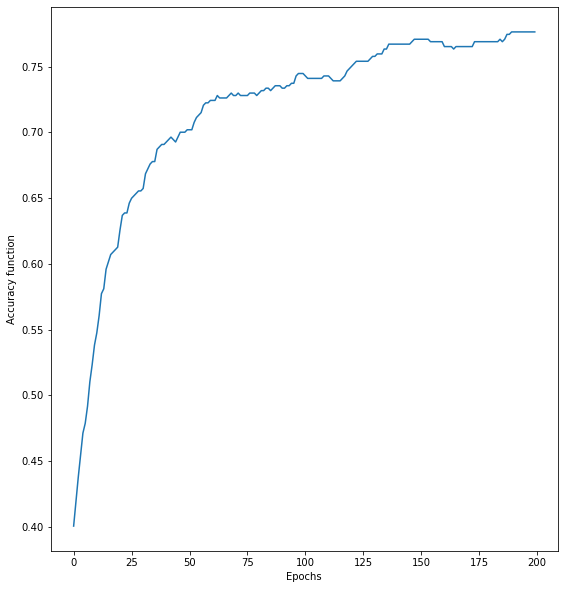

In [8]:
#Ver el performance del modelo en el entrenamiento (accuracy)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')
#Accurcy mientras mas grande mejor

In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test) #predecir en términos de decimales
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #en términos de 1 y 0


8/8 [==============================] - 0s 2ms/step


x_nueva_persona = [6,45,242,234]
model.predict(x)

In [10]:
Y_pred

array([[0.31778952],
       [0.12833051],
       [0.15691997],
       [0.20594558],
       [0.48553368],
       [0.53172207],
       [0.06667828],
       [0.22139192],
       [0.5809559 ],
       [0.68429047],
       [0.33830196],
       [0.78380156],
       [0.52469355],
       [0.3444062 ],
       [0.07670293],
       [0.39143842],
       [0.09733713],
       [0.09290376],
       [0.39429906],
       [0.57019764],
       [0.22066438],
       [0.10443598],
       [0.3688001 ],
       [0.09093606],
       [0.56431955],
       [0.77672166],
       [0.16686015],
       [0.09586933],
       [0.34130076],
       [0.1478517 ],
       [0.67057234],
       [0.7981579 ],
       [0.80542886],
       [0.36576465],
       [0.5171177 ],
       [0.76332223],
       [0.6556779 ],
       [0.2518624 ],
       [0.46880674],
       [0.22933125],
       [0.09066413],
       [0.3969997 ],
       [0.50826186],
       [0.35637647],
       [0.149277  ],
       [0.70757943],
       [0.5080373 ],
       [0.144

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#métricas en el test
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 1ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.777 	 0.727 	 0.580
  Test 	 0.732 	 0.618 	 0.588


#Tiene buenas metricas, mientras mas cercano al 1 mejor

**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

- Se usa cuando tienes mas de 2 clases (multiclases)
- La suma de sus probabilidades debe de ser 1 
- Debe de haber solo 1 respuesta correcta

In [13]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#Cuando se usa una red neuronal y hay multiclases es necesario cambiarlo a dummies
#creamos la variable target a dummies para poderla trabajar en la red neuronal
dummy_y = np_utils.to_categorical(Y).astype(int)
#Donde sea 0 va a poner 1 , donde sea 1 va a poner 0 y cuando sea 2 va a poner 1

In [18]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [26]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax')) #Tiene que a ver una salida conforme a los tipos que tenga

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',#funcion de costo 
              optimizer=sgd,#gradiente descendente
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


C:\Users\gerar\OneDrive\Documentos\Curso de prgoramacion de datos\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 1s 262ms/step - loss: 3.6768 - accuracy: 0.3833 - val_loss: 3.1756 - val_accuracy: 0.7000
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 3.2126 - accuracy: 0.5917 - val_loss: 0.9367 - val_accuracy: 0.7000
Epoch 3/200
2/2 [==============================] - 0s 30ms/step - loss: 0.9565 - accuracy: 0.6083 - val_loss: 1.0672 - val_accuracy: 0.3667
Epoch 4/200
2/2 [==============================] - 0s 37ms/step - loss: 0.9940 - accuracy: 0.5917 - val_loss: 0.6540 - val_accuracy: 0.6333
Epoch 5/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6478 - accuracy: 0.6667 - val_loss: 0.5977 - val_accuracy: 0.6333
Epoch 6/200
2/2 [==============================] - 0s 46ms/step - loss: 0.5516 - accuracy: 0.7167 - val_loss: 0.5221 - val_accuracy: 0.7000
Epoch 7/200
2/2 [==============================] - 0s 37ms/step - loss: 0.5609 - accuracy: 0.6583 - val_loss: 0.4098 - val_accuracy: 0.7333
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 53ms/step - loss: 0.0716 - accuracy: 0.9667 - val_loss: 0.0807 - val_accuracy: 0.9667
Epoch 118/200
2/2 [==============================] - 0s 43ms/step - loss: 0.1005 - accuracy: 0.9750 - val_loss: 0.0950 - val_accuracy: 1.0000
Epoch 119/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 0.0763 - val_accuracy: 1.0000
Epoch 120/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0879 - accuracy: 0.9833 - val_loss: 0.0716 - val_accuracy: 0.9667
Epoch 121/200
2/2 [==============================] - 0s 42ms/step - loss: 0.0665 - accuracy: 0.9833 - val_loss: 0.2652 - val_accuracy: 0.8667
Epoch 122/200
2/2 [==============================] - 0s 43ms/step - loss: 0.1050 - accuracy: 0.9417 - val_loss: 0.2813 - val_accuracy: 0.8667
Epoch 123/200
2/2 [==============================] - 0s 62ms/step - loss: 0.2726 - accuracy: 0.9083 - val_loss: 0.0822 - val_accuracy: 1.0000
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 61ms/step - loss: 0.0893 - accuracy: 0.9583 - val_loss: 0.0667 - val_accuracy: 0.9667
Epoch 176/200
2/2 [==============================] - 0s 44ms/step - loss: 0.0727 - accuracy: 0.9750 - val_loss: 0.0728 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 56ms/step - loss: 0.0805 - accuracy: 0.9750 - val_loss: 0.0788 - val_accuracy: 1.0000
Epoch 178/200
2/2 [==============================] - 0s 49ms/step - loss: 0.0680 - accuracy: 0.9833 - val_loss: 0.1490 - val_accuracy: 0.9000
Epoch 179/200
2/2 [==============================] - 0s 47ms/step - loss: 0.0921 - accuracy: 0.9583 - val_loss: 0.0817 - val_accuracy: 1.0000
Epoch 180/200
2/2 [==============================] - 0s 59ms/step - loss: 0.0729 - accuracy: 0.9833 - val_loss: 0.0723 - val_accuracy: 0.9667
Epoch 181/200
2/2 [==============================] - 0s 67ms/step - loss: 0.0781 - accuracy: 0.9750 - val_loss: 0.0671 - val_accuracy: 0.9667
Epoch 

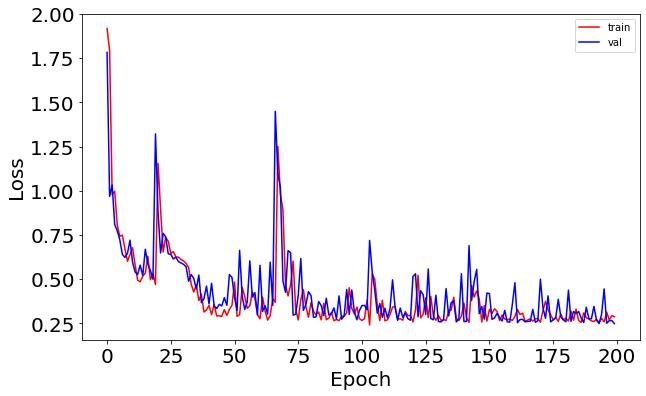

In [27]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)
#Coss entropi mientras mas abajo mejor

In [22]:
#Predecir con el modelo
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 19ms/step


In [23]:
Y_pred

array([[3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [9.9999976e-01, 2.3173594e-07, 2.7982131e-13],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [9.9999905e-01, 9.1362585e-07, 2.7601686e-12],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [9.9999583e-01, 4.1874268e-06, 3.5004027e-11],
       [1.0000000e+00, 3.0320223e-08, 9.4005521e-15],
       [9.9999523e-01, 4.7710146e-06, 4.3517346e-11],
       [9.9999976e-01, 2.6657261e-07, 3.5347772e-13],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.1700413e-01, 4.7949067e-01],
       [3.5051776e-03, 5.170

In [24]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [28]:
#Dejarlo en forma de los datos originales
#Hacer ingenería en reversa, para dejar las predicciones en el formato original que teníamos de las "Y"
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [29]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [30]:
#Métricas de performance
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#métricas en el train
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted') #Cuando hay muchas clases se debe añadir average='weighted'
reca_train = recall_score(y_train, Y_pred,average='weighted')


#métricas en el test
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 28ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 0.967 	 0.969 	 0.967
